<a href="https://colab.research.google.com/github/vitorquintella/CheatSheets/blob/main/Dicas_uteis_e_fun%C3%A7%C3%B5es_r%C3%A1pidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas Manipulação

In [2]:
import pandas as pd

In [6]:
# Ler um csv direto de um site
uci_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
df= pd.read_csv(uci_url + 'winequality-red.csv', sep =';')

# Inserir uma coluna condicional
df['quality_class'] = (df['quality'] >= 7).astype(int)

In [7]:
print(df.columns)

# Renomear colunas, Remove espaço from column names usando lambda
df = df.rename(columns=lambda x: x.replace(' ', '_'))

print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_class'],
      dtype='object')
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_class'],
      dtype='object')


# Análise inicial

In [15]:
#Verificação inicial de dadosm tipos e e nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  quality_class         1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


In [18]:
# Descrisção com estatísticas básicas de cada coluna
df.describe().round(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64,0.14
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81,0.34
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00,0.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00,0.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00,0.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00,1.00


# Seaborn, matplotlib e vizualização

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

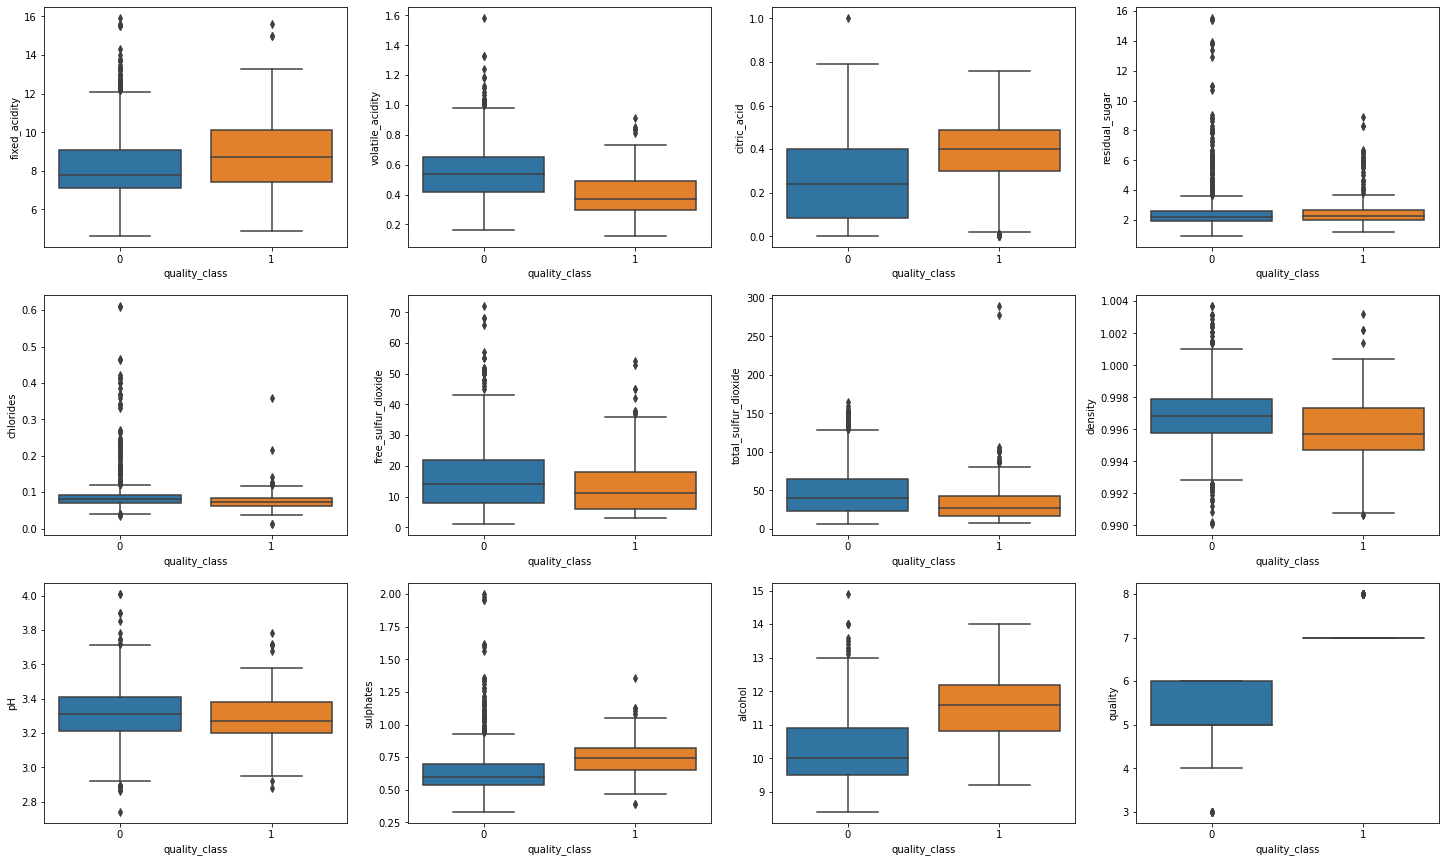

In [10]:
# Multiplos plots em mesmo plot:

dims = (3, 4)
 
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in df.columns:
  if col == 'is_red' or col == 'quality_class':
    continue # Box plots cannot be used on indicator variables
  sns.boxplot(x=df['quality_class'], y=df[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

# Split, teste e treino

In [21]:
from sklearn.model_selection import train_test_split

In [29]:
# Pode ser feito antes de selecionar variáveis
train, test = train_test_split(df, test_size =0.25, random_state=123, 
                               stratify=df[["quality_class"]])
X_train = train.drop(["quality_class"], axis=1)
X_test = test.drop(["quality_class"], axis=1)
y_train = train[["quality_class"]]
y_test = test[["quality_class"]]

y_test

,quality_class
495,1
847,0
1179,0
620,0
1110,0
...,...
966,1
1185,0
894,0
1565,0


In [28]:
# Pode ser feito depois de selecionar variáveis
X = df.drop(columns=['quality', "quality_class"])
y = df[["quality_class"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state=123, stratify=y)
y_test

,quality_class
495,1
847,0
1179,0
620,0
1110,0
...,...
966,1
1185,0
894,0
1565,0
